Setup

In [1]:
%matplotlib inline

import dataLoader
import matplotlib.pyplot as plt
import torch
import CNN

# defining global variables
image_path = "./Fish_toy/images"
training_count=2
validation_count=1
batchSize=20
n_epochs=500
kernels = [16, 32]
kernelSize = 5
imgH = 14

Cuda support

In [2]:
# CUDA support 
if torch.cuda.is_available():
    torch.cuda.set_device(0) # 0
    torch.set_default_tensor_type('torch.cuda.FloatTensor')
    print("We are using cuda")

We are using cuda


Load images

In [3]:
import torchvision

# load images
dataset = dataLoader.FishDataset(image_path, imgH)
numberOfSpecies = len(dataset.getSpeciesList())
print("Number of species = ", numberOfSpecies)

# get Loaders
train_loader, validation_loader, test_loader = dataLoader.getLoadersFromDataset(dataset, training_count, validation_count, batchSize)

Number of species =  25


Create model

In [4]:
model = CNN.CNN(numberOfSpecies, imgH, kernels, kernelSize)
loss_list, accuracy_list = CNN.trainModel(train_loader, validation_loader, n_epochs, model)

N/A% (0 of 500) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--

Training started...


100% (500 of 500) |######################| Elapsed Time: 0:20:05 Time:  0:20:05


Early stopping
total number of epochs:  179


Plot

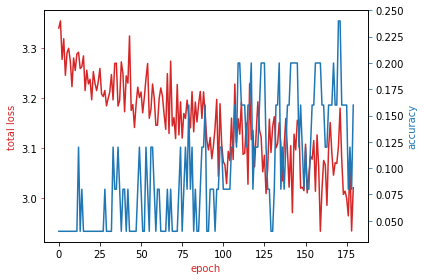

In [5]:
# Plot the loss and accuracy

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(loss_list, color=color)
ax1.set_xlabel('epoch', color=color)
ax1.set_ylabel('total loss', color=color)
ax1.tick_params(axis='y', color=color)
    
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color)  
ax2.plot( accuracy_list, color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()

Create confusion matrix

/home/elhamod/Insync/mndhamod@gmail.com/Google Drive/Colab Notebooks/BGNN/confusion_matrix_plotter.py:60: RuntimeWarning: invalid value encountered in true_divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


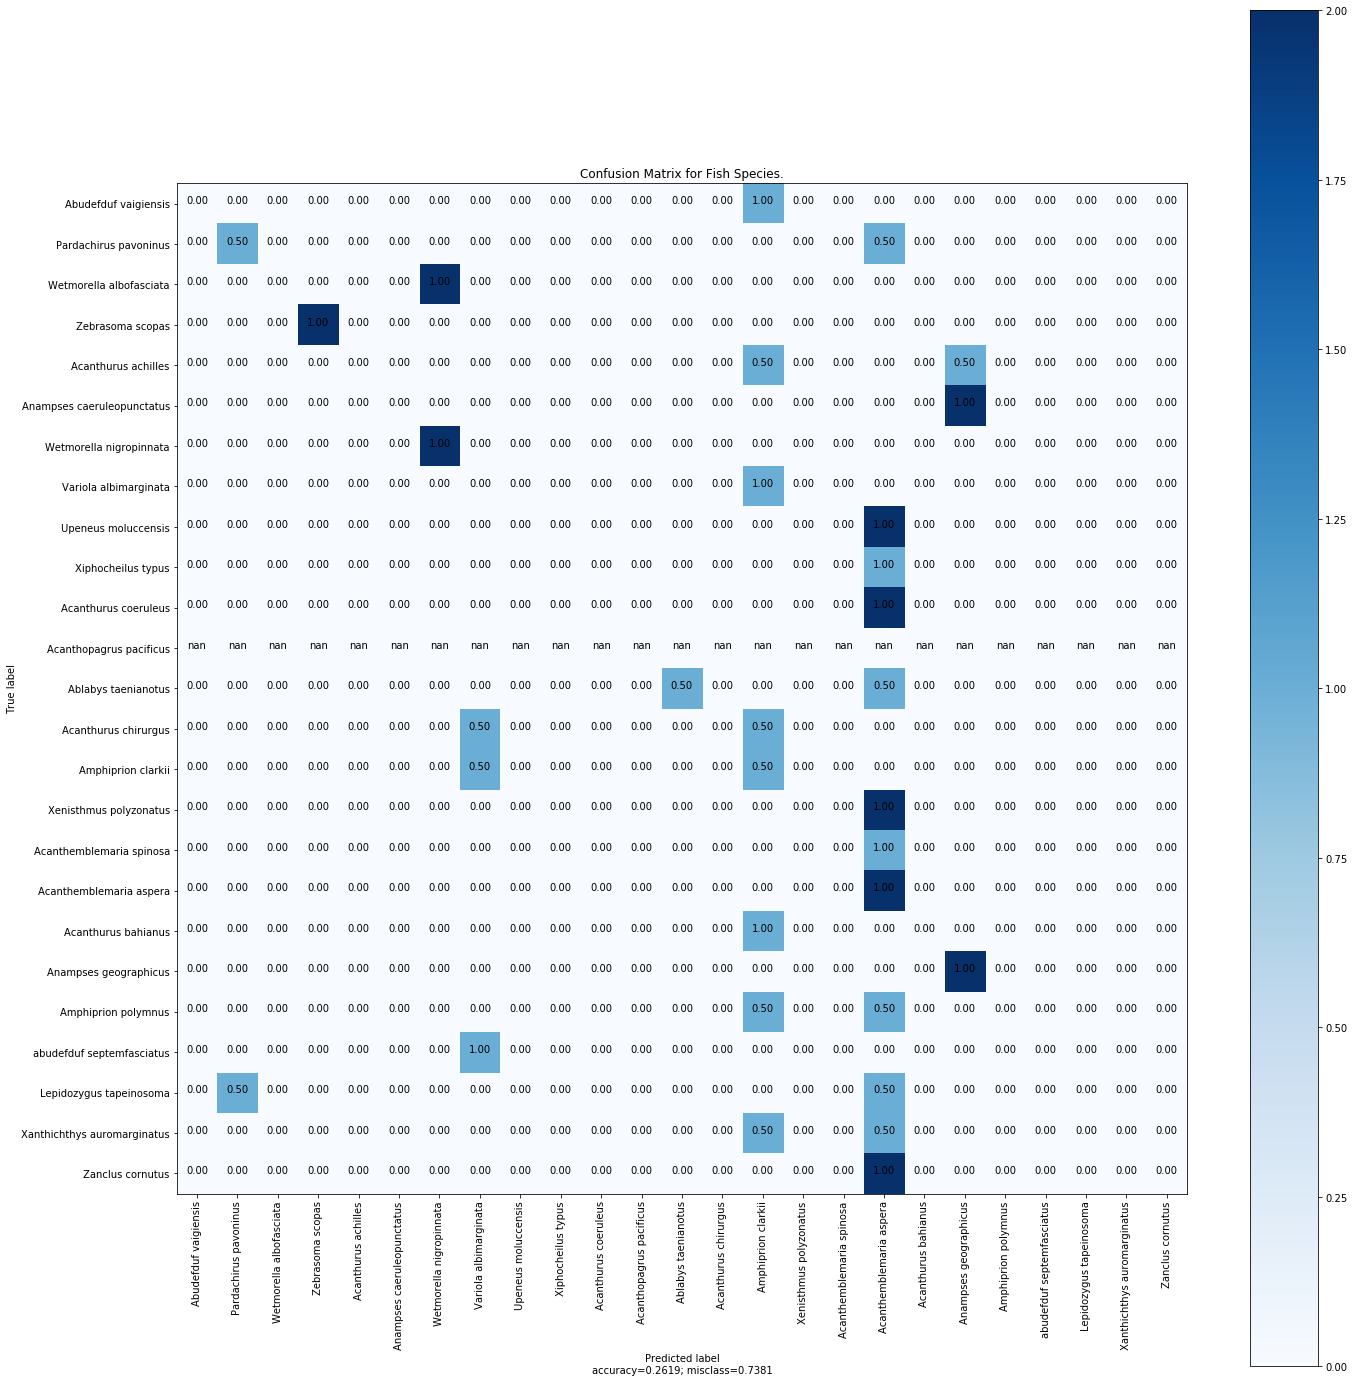

In [6]:
from sklearn.metrics import confusion_matrix
from confusion_matrix_plotter import plot_confusion_matrix2

# Initialize the prediction and label lists(tensors)
predlist=torch.zeros(0)
lbllist=torch.zeros(0)

with torch.no_grad():
    for batch in test_loader:
        inputs = batch["image"]
        classes = batch["class"]
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)

        predlist=torch.cat([predlist,preds.float().view(-1)])
        lbllist=torch.cat([lbllist,classes.float().view(-1)])

conf_mat=confusion_matrix(lbllist.cpu().numpy(), predlist.cpu().numpy(), labels = range(numberOfSpecies))
    
plot_confusion_matrix2(conf_mat,
                          dataset.getSpeciesList(),
                          title='Confusion Matrix for Fish Species.')


Precision/Recall/Fscore

In [7]:
from sklearn.metrics import classification_report
print(classification_report(lbllist.cpu().numpy(), predlist.cpu().numpy(), labels = range(numberOfSpecies), digits=1))

              precision    recall  f1-score   support

           0        0.0       0.0       0.0         1
           1        0.5       0.5       0.5         2
           2        0.0       0.0       0.0         2
           3        1.0       1.0       1.0         2
           4        0.0       0.0       0.0         2
           5        0.0       0.0       0.0         2
           6        0.5       1.0       0.7         2
           7        0.0       0.0       0.0         1
           8        0.0       0.0       0.0         2
           9        0.0       0.0       0.0         1
          10        0.0       0.0       0.0         2
          11        0.0       0.0       0.0         0
          12        1.0       0.5       0.7         2
          13        0.0       0.0       0.0         2
          14        0.1       0.5       0.2         2
          15        0.0       0.0       0.0         2
          16        0.0       0.0       0.0         1
          17        0.1    

/home/elhamod/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/elhamod/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
